Importing all essential libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
 

In [79]:
df = pd.read_csv("./income.csv")
df.info()
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       

No Null values were found checking dtypes and unique values now

In [80]:
df.dtypes

# && 

print(np.unique(df["age"]))

print(np.unique(df["JobType"]))

print(np.unique(df["EdType"]))

print(np.unique(df["maritalstatus"]))

print(np.unique(df["occupation"]))

print(np.unique(df["relationship"]))

print(np.unique(df["race"]))

print(np.unique(df["gender"]))

print(np.unique(df["capitalgain"]))

print(np.unique(df["capitalloss"]))

print(np.unique(df["hoursperweek"]))

print(np.unique(df["nativecountry"]))

print(np.unique(df["SalStat"]))





[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']

Cleaning a garbage value in JobTYpe and in occupation
Another method to replace string values with 0,1 categorical values

df['SalStat'] = df['SalStat'].map(
    {' less than or equal to 50,000': 0, ' greater than 50,000': 1})



In [81]:
df["JobType"].replace(" ?",'nan', inplace=True)
df["JobType"].replace( "nan", df["JobType"].value_counts().index[0] , inplace=True)
df["occupation"].replace( " ?", df["occupation"].value_counts().index[0] , inplace=True)


print(df["JobType"].value_counts())
print(df["occupation"].value_counts())



 Private             24095
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64
 Prof-specialty       5854
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64


replacing the categorical strings with 0 and 1 using the replace ()

In [82]:
print(df["SalStat"])

df.replace(" greater than 50,000","1",inplace=True)
df.replace(" less than or equal to 50,000","0",inplace=True)

print(df["SalStat"])


0         less than or equal to 50,000
1         less than or equal to 50,000
2                  greater than 50,000
3         less than or equal to 50,000
4         less than or equal to 50,000
                     ...              
31973     less than or equal to 50,000
31974     less than or equal to 50,000
31975     less than or equal to 50,000
31976     less than or equal to 50,000
31977     less than or equal to 50,000
Name: SalStat, Length: 31978, dtype: object
0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: object


Exploratory analysis CrossTabs in Income.csv

Marginal Probability - prob of occurance in single event.

Conditional Probability - probability of an event (A) given that another event has already occured.
   normalize = "columns"
   normalize = "index"

In [83]:
print(pd.crosstab(index=df["SalStat"] , columns=df["race"]))

print(pd.crosstab(index=df["SalStat"] , columns=df["race"]))

print(pd.crosstab(index= df["JobType"],columns=df["EdType"],normalize = True, dropna=True))
#marginal Probability - prob of occurance in single event
print(pd.crosstab(index= df["JobType"],columns=df["EdType"], margins=True ,normalize = True, dropna=True))
#conditional probability 
print(pd.crosstab(index=df["gender"],columns=df["maritalstatus"] , margins = True, normalize= "index" , dropna="True"))


print(pd.crosstab(index=df["gender"],columns=df["maritalstatus"] , margins = True, normalize= "columns" , dropna="True"))


race      Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other   White
SalStat                                                                  
0                        275                  703    2654     231   20420
1                         36                  253     374      22    7010
race      Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other   White
SalStat                                                                  
0                        275                  703    2654     231   20420
1                         36                  253     374      22    7010
EdType                 10th      11th      12th   1st-4th   5th-6th   7th-8th  \
JobType                                                                         
 Federal-gov       0.000188  0.000281  0.000156  0.000000  0.000031  0.000063   
 Local-gov         0.000969  0.001126  0.000594  0.000125  0.000250  0.000844   
 Never-worked      0.000063  0.000031  0.000000  0.000000  0.000000  0.000031   
 Pr

Visualization in Income.csv

<AxesSubplot: xlabel='count', ylabel='EdType'>

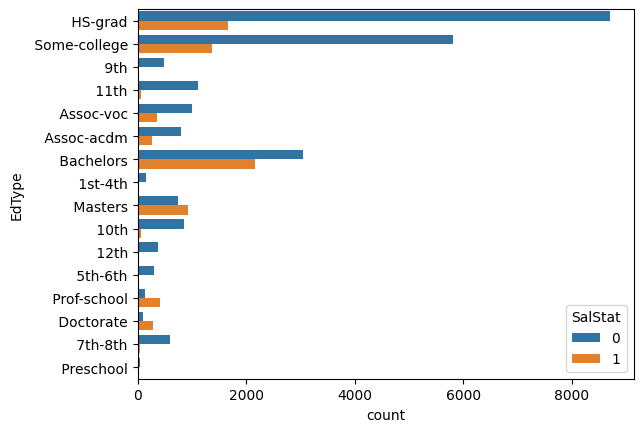

In [84]:
pd.crosstab(index=df['EdType'], columns=df['SalStat'],
            normalize=True, margins=True)

sns.countplot(y="EdType", data=df, hue="SalStat") 

<AxesSubplot: xlabel='count', ylabel='occupation'>

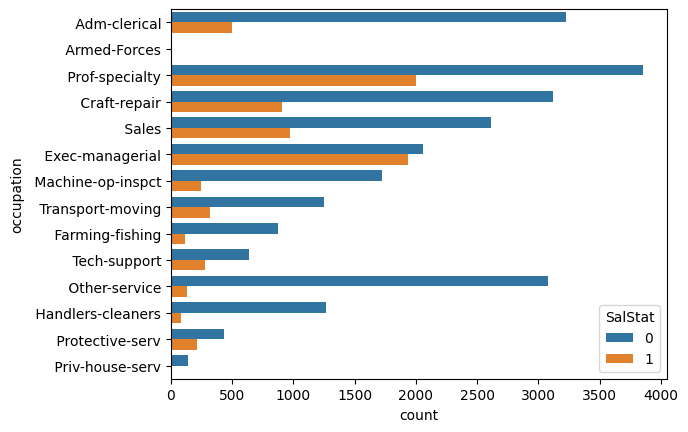

In [85]:
pd.crosstab(index=df['occupation'],
            columns=df['SalStat'], normalize=True, margins=True)

sns.countplot(y="occupation", data=df, hue="SalStat")    

<AxesSubplot: xlabel='SalStat', ylabel='hoursperweek'>

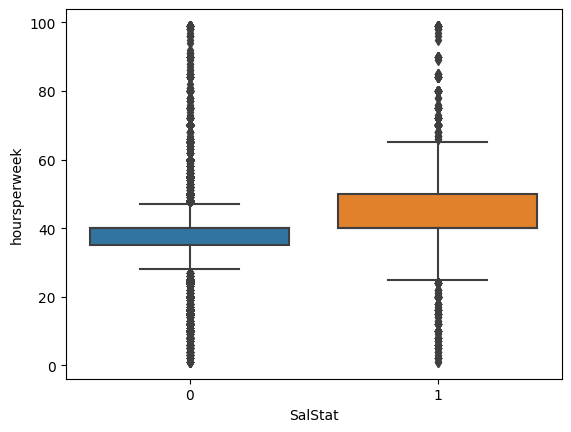

In [86]:
pd.crosstab(index=df['hoursperweek'],
                      columns=df['SalStat'], normalize=True, margins=True)

sns.boxplot(x=df['SalStat'], y=df["hoursperweek"])

SalStat = label which my model is gonna be predicting while using independent columns using the linear regression

model building

001 . Simple Linear regression

In [89]:
df1 = pd.get_dummies(df)
# now, list new columns 13 - -> 95
colums_list = list(df1.columns)

x = df1.drop(['SalStat'], axis="columns" ,  inplace=False)
y = df1['SalStat']

# splitting the data
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size=0.3, random_state=0)

logistic = LogisticRegression()
liner = linear_model.LinearRegression()

logistic.fit(train_x, train_y)
logistic.coef_
logistic.intercept_

# predict model
prediction = logistic.predict(test_x)

# confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
accuracy = accuracy_score(test_y, prediction)
print(accuracy)



KeyError: "['SalStat'] not found in axis"